<a href="https://colab.research.google.com/github/e11106013/LLM/blob/main/%E8%A6%96%E8%A6%BA%E5%8C%96_RDF_%E4%BA%A4%E9%80%9A%E9%83%A8_%E9%81%93%E8%B7%AF%E8%B7%AF%E5%90%8D%E8%A1%A8_%E7%B8%BD%E8%A1%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  原始檔案下載至 https://link.motc.gov.tw/DownloadFile
  [道路路名表-總表](https://docs.google.com/spreadsheets/d/1qjJ_D8vvfxWA_WPFxYMS9_oOYPv1XGOZ_jtwnROmy88/edit?usp=drive_link)

  "道路路名表-總表"資料內容如下表:

  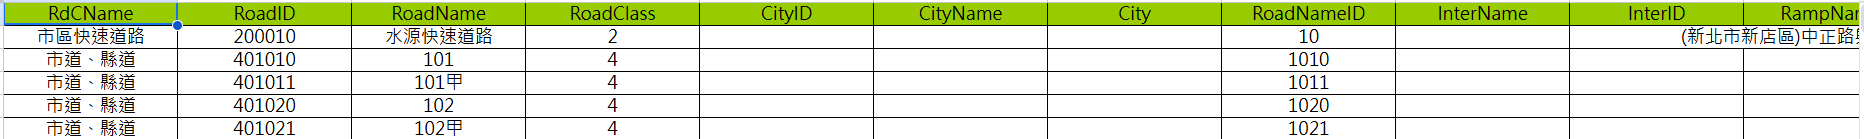

In [1]:
#@title 安裝必要的rdflib 套件
%%capture
!pip install rdflib jupyter-dash dash_cytoscape dash

In [13]:
#@title 讀取turtle檔案中的資訊
from rdflib import Graph


#@title 擷取一部分內容展示
g = Graph()
# create graph using turtle
turtledata = """\
@prefix ex: <http://example.org/road/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix schema1: <http://schema.org/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ex:00001A a schema1:Route ;
    rdfs:label "國道1號汐止五股高架道路" ;
    ex:cityID "NaN"^^xsd:double ;
    ex:intersectionID "NaN"^^xsd:double,
        1e+00,
        2e+00,
        3e+00,
        4e+00,
        5e+00 ;
    ex:intersectionName "NaN"^^xsd:double,
        "下塔悠出口匝道",
        "五股轉接道",
        "堤頂交流道",
        "汐止端",
        "環北交流道" ;
    ex:mileLength "18.7"^^xsd:float ;
    ex:rampID "NaN"^^xsd:double ;
    ex:rampName "NaN"^^xsd:double ;
    ex:roadChineseName "國道" ;
    ex:roadClass 0 ;
    ex:roadNameID "0001A" ;
    ex:version "24.11.1" ;
    schema1:addressLocality "NaN"^^xsd:double ;
    schema1:addressRegion "NaN"^^xsd:double ;
    schema1:dateModified "2024-11-22"^^xsd:date ;
    schema1:description "NaN"^^xsd:double ;
    schema1:length "0.2508"^^xsd:float,
        "0.509"^^xsd:float,
        "1.9796"^^xsd:float,
        "3.5265"^^xsd:float,
        "3.7746"^^xsd:float,
        "18.6907"^^xsd:float .
"""
g.parse(data=turtledata, format="turtle")

<Graph identifier=Ndef07e5fbb65463c84c4f8e9a1aaed56 (<class 'rdflib.graph.Graph'>)>

In [14]:
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output, State
import dash_cytoscape as cyto
import rdflib

# 使用 JupyterDash 而不是 Dash
app = JupyterDash(__name__)

def simplify_uri(uri):
    if '#' in uri:
        return uri.split('#')[-1]
    else:
        return uri.rstrip('/').split('/')[-1]


# 提取所有三元組，轉成 Cytoscape 格式
def get_graph_elements_from_rdf(graph, filter_keyword=None):
    nodes = {}
    edges = []
    for s, p, o in graph:
        s_str = str(s)
        p_str = str(p)
        o_str = str(o)

        if filter_keyword:
            if not (filter_keyword in s_str or filter_keyword in p_str or filter_keyword in o_str):
                continue

        if s_str not in nodes:
            nodes[s_str] = {'data': {'id': s_str, 'label': simplify_uri(s_str)}}
        if o_str not in nodes:
            nodes[o_str] = {'data': {'id': o_str, 'label': simplify_uri(o_str)}}

        edges.append({
            'data': {'source': s_str, 'target': o_str, 'label': simplify_uri(p_str)}
        })
    return list(nodes.values()) + edges

app.layout = html.Div([
    html.H2("TTL 知識圖譜視覺化"),
    dcc.Input(id='filter-input', type='text', placeholder='輸入關鍵字過濾', style={'width': '80%'}),
    html.Button('顯示', id='filter-button', n_clicks=0),
    cyto.Cytoscape(
        id='cytoscape-graph',
        layout={'name': 'cose'},
        style={'width': '100%', 'height': '600px'},
        elements=[],
        stylesheet=[
            {
                'selector': 'node',
                'style': {
                    'label': 'data(label)',
                    'background-color': '#0074D9',
                    'color': 'white',
                    'text-valign': 'center',
                    'text-halign': 'center',
                    'font-size': 10,
                    'width': 'label',
                    'padding': '8px',
                    'shape': 'roundrectangle',
                    'border-width': 1,            # 邊框調整，預設是 0
                    'border-color': '#333333'   # 邊框顏色
                }
            },
            {
                'selector': 'edge',
                'style': {
                    'curve-style': 'bezier',
                    'target-arrow-shape': 'triangle-backcurve',
                    'source-arrow-shape': 'none',
                    'target-arrow-color': '#000',
                    'line-color': '#000',
                    'arrow-scale': 1.5,
                    'width': 2,
                    'label': 'data(label)',
                    # 加框設定
                    'text-background-color': '#EEE',           # 背景顏色
                    'text-background-opacity': 1,              # 背景不透明度（0～1）
                    'text-background-shape': 'roundrectangle', # 形狀： rectangle / roundrectangle
                    'text-border-color': '#333',               # 框線顏色
                    'text-border-width': 1,                    # 框線寬度
                    'text-border-opacity': 1,                  # 框線不透明度（0～1）
                    # 其他文字樣式
                    'font-size':  9,
                    'text-rotation': 'autorotate',
                    'color': '#000'
                }
            }
        ]
    )
])

@app.callback(
    Output('cytoscape-graph', 'elements'),
    Input('filter-button', 'n_clicks'),
    State('filter-input', 'value')
)
def update_graph(n_clicks, filter_keyword):
    return get_graph_elements_from_rdf(g, filter_keyword)

# 使用 jupyter_dash 的 inline 模式
app.run(mode='inline', debug=True)


<IPython.core.display.Javascript object>